<h1 style="text-align: center;">Domača naloga 3:<br/>Matematično nihalo</h1>
<p style="text-align: center;">Maksimiljan Vojvoda<br/>Avgust 2024</p>

## Uvod

V domači nalogi je bilo potrebno implementirati funkcijo, ki simulira matematično nihalo z uporabo Runge-Kutta metode četrtega reda.


## Matematično nihalo

Matematično nihalo je opisano z sledečimi funkcijami:

$$ \varphi(0) = \varphi_0 $$
$$ \varphi'(0) = \varphi'_0 $$
$$ \frac{g}{l} sin(\varphi(t)) + \varphi''(t) = 0 $$

Kjer sta $\varphi_0$ začetni kotni odmik nihala, $\varphi'_0$ pa začetna kotna hitrost, $g = 9.80665 \frac{m}{s^2}$ in $l$ dolžina nihala.<br/>
Iz enačbe lahko izrazimo $\varphi''$:

$$ \varphi''(t) = -\frac{g}{l} sin(\varphi(t)) $$

## Metoda

Za simulacijo je uporabljena Runge-Kutta metoda četrtega reda:

$$ k_1 = h \ f(x_n, y_n) $$
$$ k_2 = h \ f(x_n + \frac{h}{2}, y_n + \frac{k_1}{2}) $$
$$ k_3 = h \ f(x_n + \frac{h}{2}, y_n + \frac{k_2}{2}) $$
$$ k_4 = h \ f(x_n + h, y_n + k_3) $$

$$ y_{n+1} = y_n + \frac{k_1 + 2k_2 + 2k_3 + k_4}{6} $$


## Rezultati

In [2]:
function nihalo_path(l, t, θ0, Δθ0, n)
	if (t < 0)
		throw("t must be positive.")
	elseif (l <= 0)
		throw("l must be positive.")
	elseif (n <= 0)
		throw("n must be positive.")
	end
	
	g = 9.80665 / l
	h = t/n
	
	ϕ = θ0
	v = Δθ0
	
	x = zeros(n+1)
	y = zeros(n+1)
	x[1] = 0
	y[1] = ϕ
	
	function f(pos, vel)
		return [vel, -g * sin(pos)]
	end
	
	for i in 1:n
		k1 = f(ϕ, v) * h
		k2 = f(ϕ + k1[1]/2, v + k1[2]/2) * h
		k3 = f(ϕ + k2[1]/2, v + k2[2]/2) * h
		k4 = f(ϕ + k3[1],   v + k3[2]) * h
		
		ϕ += (k1[1] + 2*k2[1] + 2*k3[1] + k4[1]) / 6
		v += (k1[2] + 2*k2[2] + 2*k3[2] + k4[2]) / 6
		
		x[i+1] = h*i
		y[i+1] = ϕ
	end
	
	return (x, y)
end

nihalo_path (generic function with 1 method)

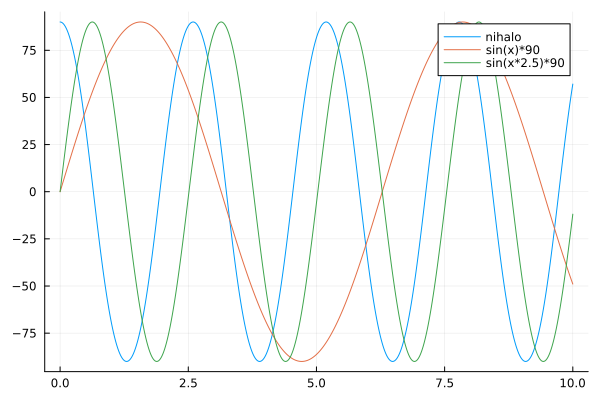

In [5]:
using Plots

t = 10
l = 1.2
pos_0 = pi/2

x, y = nihalo_path(l, t, pos_0, 0, t*1000);

plot(x, y * 180/pi, label="nihalo", legend=:topright)
plot!(x, sin.(x) * 90, label="sin(x)*90")
plot!(x, sin.(x * 2.5) * 90, label="sin(x*2.5)*90")


Spremembe nihajnega časa v primerjavi z začetno energijo lahko vidimo na sledečem grafu, kjer je začetna energija odvisna od dolžine nihala:

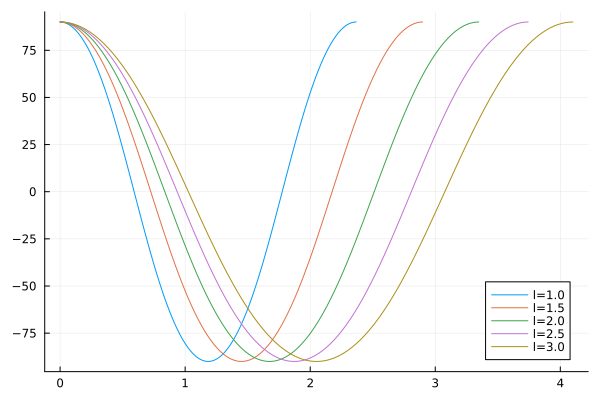

In [50]:
using Plots

function shorten(x, y)
	i = findfirst(e->isapprox(e, y[1], rtol=1e-6), y[2:end])
	return x[1:i], y[1:i]
end

t = 5
p0 = pi/2

x, y = nihalo_path(1, t, p0, 0, t*1000);
x, y = shorten(x, y)
p = plot(x, y*180/pi, label="l=1.0")

for l in 1.5:0.5:3
	x, y = nihalo_path(l, t, p0, 0, t*1000);
	x, y = shorten(x, y)
	plot!(p, x, y*180/pi, label="l=$l")
end

plot(p, leg=true)